## Retail Sentiment Tracker For Stock Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/shamn/Downloads/archive (8)/daily_retail_sentiment_vs_stock.csv")
print(df.head(5))

         Date Stock Ticker  Open Price  Close Price  High Price  Low Price  \
0  2020-01-01         AAPL      593.08      1025.42      989.97    1374.69   
1  2020-01-01         TSLA     1428.54      1205.19      299.96     811.77   
2  2020-01-01         AMZN     1111.39       413.18     1314.97    1101.12   
3  2020-01-01        GOOGL      918.05       956.07      939.02     682.27   
4  2020-01-01         MSFT      276.23       879.03      277.95     963.55   

   Trading Volume  Sentiment Score  Mentions Volume  News Sentiment  ...  \
0        75468179           -0.162             4829          -0.119  ...   
1        76301798            0.630             5359           0.320  ...   
2         6322432            0.776             8129           0.957  ...   
3        97507225           -0.510             9855           0.904  ...   
4        55810791            0.149             4784          -0.209  ...   

   MACD    RSI  Momentum  Beta   Alpha  Sharpe Ratio  Day Return %  \
0 -2

In [4]:
df.columns

Index(['Date', 'Stock Ticker', 'Open Price', 'Close Price', 'High Price',
       'Low Price', 'Trading Volume', 'Sentiment Score', 'Mentions Volume',
       'News Sentiment', 'Volatility Index', '5d MA', '10d MA', '20d MA',
       'MACD', 'RSI', 'Momentum', 'Beta', 'Alpha', 'Sharpe Ratio',
       'Day Return %', 'Week Return %', 'Month Return %', 'Sector'],
      dtype='object')

In [5]:
#replacing the space in column names
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['Date', 'Stock_Ticker', 'Open_Price', 'Close_Price', 'High_Price',
       'Low_Price', 'Trading_Volume', 'Sentiment_Score', 'Mentions_Volume',
       'News_Sentiment', 'Volatility_Index', '5d_MA', '10d_MA', '20d_MA',
       'MACD', 'RSI', 'Momentum', 'Beta', 'Alpha', 'Sharpe_Ratio',
       'Day_Return_%', 'Week_Return_%', 'Month_Return_%', 'Sector'],
      dtype='object')

In [6]:
#capitalising column name to std format
df.columns=df.columns.str.capitalize()
df.columns

Index(['Date', 'Stock_ticker', 'Open_price', 'Close_price', 'High_price',
       'Low_price', 'Trading_volume', 'Sentiment_score', 'Mentions_volume',
       'News_sentiment', 'Volatility_index', '5d_ma', '10d_ma', '20d_ma',
       'Macd', 'Rsi', 'Momentum', 'Beta', 'Alpha', 'Sharpe_ratio',
       'Day_return_%', 'Week_return_%', 'Month_return_%', 'Sector'],
      dtype='object')

In [7]:
df.columns

Index(['Date', 'Stock_ticker', 'Open_price', 'Close_price', 'High_price',
       'Low_price', 'Trading_volume', 'Sentiment_score', 'Mentions_volume',
       'News_sentiment', 'Volatility_index', '5d_ma', '10d_ma', '20d_ma',
       'Macd', 'Rsi', 'Momentum', 'Beta', 'Alpha', 'Sharpe_ratio',
       'Day_return_%', 'Week_return_%', 'Month_return_%', 'Sector'],
      dtype='object')

In [8]:
df.describe()

,Open_price,Close_price,High_price,Low_price,Trading_volume,Sentiment_score,Mentions_volume,News_sentiment,Volatility_index,5d_ma,...,20d_ma,Macd,Rsi,Momentum,Beta,Alpha,Sharpe_ratio,Day_return_%,Week_return_%,Month_return_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,774.845153,766.756723,756.718443,778.740163,5.102713e+07,0.007476,5115.952333,0.003530,30.063927,788.987240,...,762.987703,-0.056040,50.16757,0.088433,1.254230,0.000183,1.021397,0.045780,0.114710,0.086460
std,422.901784,416.764288,414.097891,417.965058,2.871779e+07,0.578410,2880.190624,0.576649,11.635754,418.682749,...,421.733969,2.871396,28.70167,5.829799,0.433977,0.028688,1.154244,2.850002,5.860242,11.487069
min,50.020000,50.040000,50.350000,50.080000,1.023439e+06,-0.999000,101.000000,-0.998000,10.010000,50.030000,...,50.150000,-5.000000,0.02000,-9.990000,0.500000,-0.050000,-1.000000,-5.000000,-9.970000,-19.990000
25%,406.420000,406.307500,400.125000,419.062500,2.616226e+07,-0.491250,2661.250000,-0.491000,19.957500,429.892500,...,389.395000,-2.500000,26.10750,-4.990000,0.880000,-0.024400,0.030000,-2.390000,-5.035000,-9.790000
50%,782.765000,757.660000,749.560000,773.595000,5.113214e+07,0.014000,5227.500000,-0.011500,29.990000,800.935000,...,768.875000,-0.130000,49.74500,0.015000,1.260000,0.000000,1.025000,0.070000,0.150000,0.030000
75%,1143.782500,1120.955000,1106.582500,1144.977500,7.667475e+07,0.515000,7589.500000,0.514250,40.230000,1148.587500,...,1127.222500,2.422500,74.78000,5.262500,1.630000,0.025000,2.022500,2.502500,5.382500,10.030000
max,1499.590000,1499.360000,1499.220000,1499.530000,9.997841e+07,1.000000,9999.000000,0.999000,49.990000,1499.840000,...,1499.720000,5.000000,99.94000,9.980000,2.000000,0.050000,3.000000,4.990000,9.990000,20.000000


In [9]:
df.describe(include="all")

,Date,Stock_ticker,Open_price,Close_price,High_price,Low_price,Trading_volume,Sentiment_score,Mentions_volume,News_sentiment,...,Macd,Rsi,Momentum,Beta,Alpha,Sharpe_ratio,Day_return_%,Week_return_%,Month_return_%,Sector
count,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,300,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2020-01-01,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer
freq,10,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763
mean,NaN,NaN,774.845153,766.756723,756.718443,778.740163,5.102713e+07,0.007476,5115.952333,0.003530,...,-0.056040,50.16757,0.088433,1.254230,0.000183,1.021397,0.045780,0.114710,0.086460,NaN
std,NaN,NaN,422.901784,416.764288,414.097891,417.965058,2.871779e+07,0.578410,2880.190624,0.576649,...,2.871396,28.70167,5.829799,0.433977,0.028688,1.154244,2.850002,5.860242,11.487069,NaN
min,NaN,NaN,50.020000,50.040000,50.350000,50.080000,1.023439e+06,-0.999000,101.000000,-0.998000,...,-5.000000,0.02000,-9.990000,0.500000,-0.050000,-1.000000,-5.000000,-9.970000,-19.990000,NaN
25%,NaN,NaN,406.420000,406.307500,400.125000,419.062500,2.616226e+07,-0.491250,2661.250000,-0.491000,...,-2.500000,26.10750,-4.990000,0.880000,-0.024400,0.030000,-2.390000,-5.035000,-9.790000,NaN
50%,NaN,NaN,782.765000,757.660000,749.560000,773.595000,5.113214e+07,0.014000,5227.500000,-0.011500,...,-0.130000,49.74500,0.015000,1.260000,0.000000,1.025000,0.070000,0.150000,0.030000,NaN
75%,NaN,NaN,1143.782500,1120.955000,1106.582500,1144.977500,7.667475e+07,0.515000,7589.500000,0.514250,...,2.422500,74.78000,5.262500,1.630000,0.025000,2.022500,2.502500,5.382500,10.030000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3000 non-null   object 
 1   Stock_ticker      3000 non-null   object 
 2   Open_price        3000 non-null   float64
 3   Close_price       3000 non-null   float64
 4   High_price        3000 non-null   float64
 5   Low_price         3000 non-null   float64
 6   Trading_volume    3000 non-null   int64  
 7   Sentiment_score   3000 non-null   float64
 8   Mentions_volume   3000 non-null   int64  
 9   News_sentiment    3000 non-null   float64
 10  Volatility_index  3000 non-null   float64
 11  5d_ma             3000 non-null   float64
 12  10d_ma            3000 non-null   float64
 13  20d_ma            3000 non-null   float64
 14  Macd              3000 non-null   float64
 15  Rsi               3000 non-null   float64
 16  Momentum          3000 non-null   float64


In [11]:
df.isnull().sum()

Date                0
Stock_ticker        0
Open_price          0
Close_price         0
High_price          0
Low_price           0
Trading_volume      0
Sentiment_score     0
Mentions_volume     0
News_sentiment      0
Volatility_index    0
5d_ma               0
10d_ma              0
20d_ma              0
Macd                0
Rsi                 0
Momentum            0
Beta                0
Alpha               0
Sharpe_ratio        0
Day_return_%        0
Week_return_%       0
Month_return_%      0
Sector              0
dtype: int64

In [12]:
df.duplicated().sum()

0

### Distribution of Sentiment_score, Mentions_volume, News_sentiment

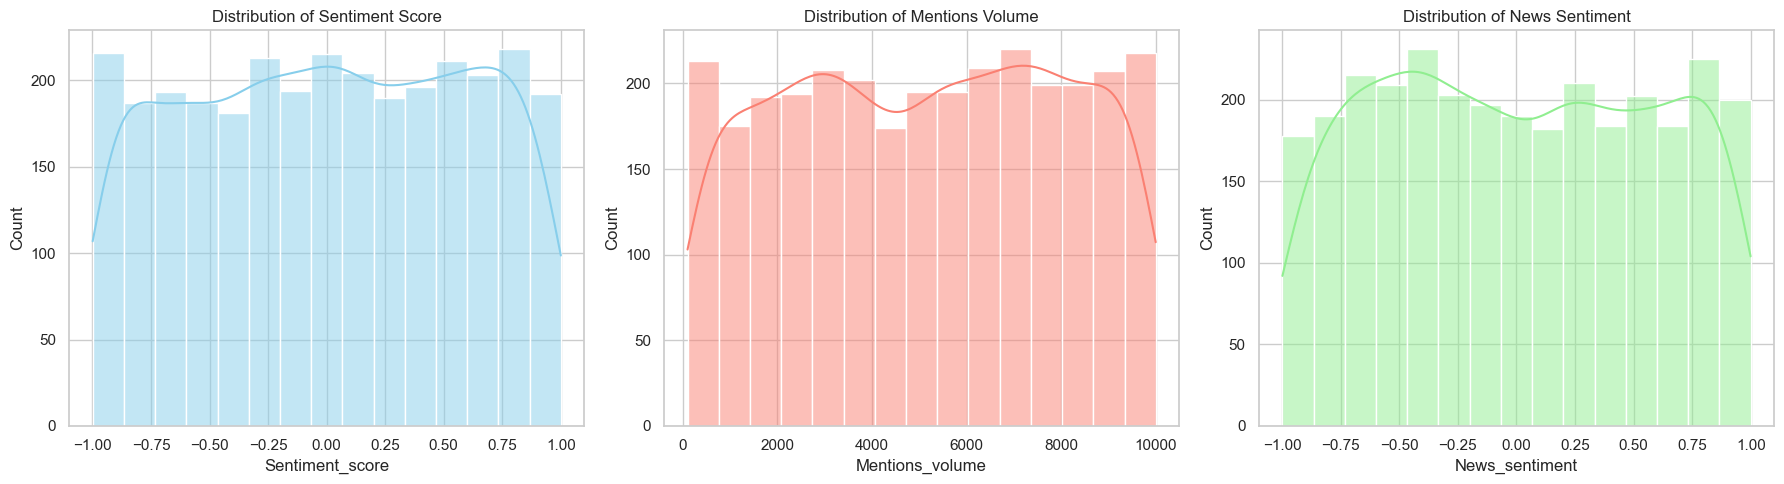

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))  # Adjust figure size to fit all subplots

# Subplot 1
plt.subplot(1, 3, 1)
sns.histplot(df['Sentiment_score'], kde=True, color='skyblue')
plt.title('Distribution of Sentiment Score')

# Subplot 2
plt.subplot(1, 3, 2)
sns.histplot(df['Mentions_volume'], kde=True, color='salmon')
plt.title('Distribution of Mentions Volume')

# Subplot 3
plt.subplot(1, 3, 3)
sns.histplot(df['News_sentiment'], kde=True, color='lightgreen')
plt.title('Distribution of News Sentiment')

plt.tight_layout()
plt.show()

1. Sentiment_score Distribution
Shape: Appears fairly uniform across the range from -1 to 1.
Interpretation: This suggests that the sentiment scores are evenly spread between negative and positive sentiment, indicating no strong skew toward positive or negative sentiment in the data.

2. Mentions_volume Distribution
Shape: Also roughly uniform but with some fluctuations, possibly bimodal tendencies in the middle ranges.
Interpretation: The volume of mentions is spread fairly evenly, with no sharp concentration at either low or high volumes, indicating consistent attention or discussion levels in the data.

3. News_sentiment Distribution
Shape: Very similar to Sentiment_score – fairly uniform from -1 to 1.
Interpretation: News sentiment is also evenly distributed, implying a balance in positive and negative news coverage or tone.

- The absence of strong skewness or sharp peaks indicates no strong bias in public or news sentiment, nor in volume metrics.






### stocks have the highest/lowest average sentiment

In [14]:
stock_sentiment = df.groupby('Stock_ticker')['Sentiment_score'].mean().sort_values()
stock_sentiment


Stock_ticker
INTC    -0.065467
META    -0.002900
AMD      0.001627
AAPL     0.004197
AMZN     0.013527
GOOGL    0.014230
NVDA     0.016733
MSFT     0.021130
TSLA     0.030730
NFLX     0.040950
Name: Sentiment_score, dtype: float64

In [15]:
print("Lowest 5 average sentiment:")
print(stock_sentiment.head())

print("\nHighest 5 average sentiment:")
print(stock_sentiment.tail())

Lowest 5 average sentiment:
Stock_ticker
INTC   -0.065467
META   -0.002900
AMD     0.001627
AAPL    0.004197
AMZN    0.013527
Name: Sentiment_score, dtype: float64

Highest 5 average sentiment:
Stock_ticker
GOOGL    0.014230
NVDA     0.016733
MSFT     0.021130
TSLA     0.030730
NFLX     0.040950
Name: Sentiment_score, dtype: float64


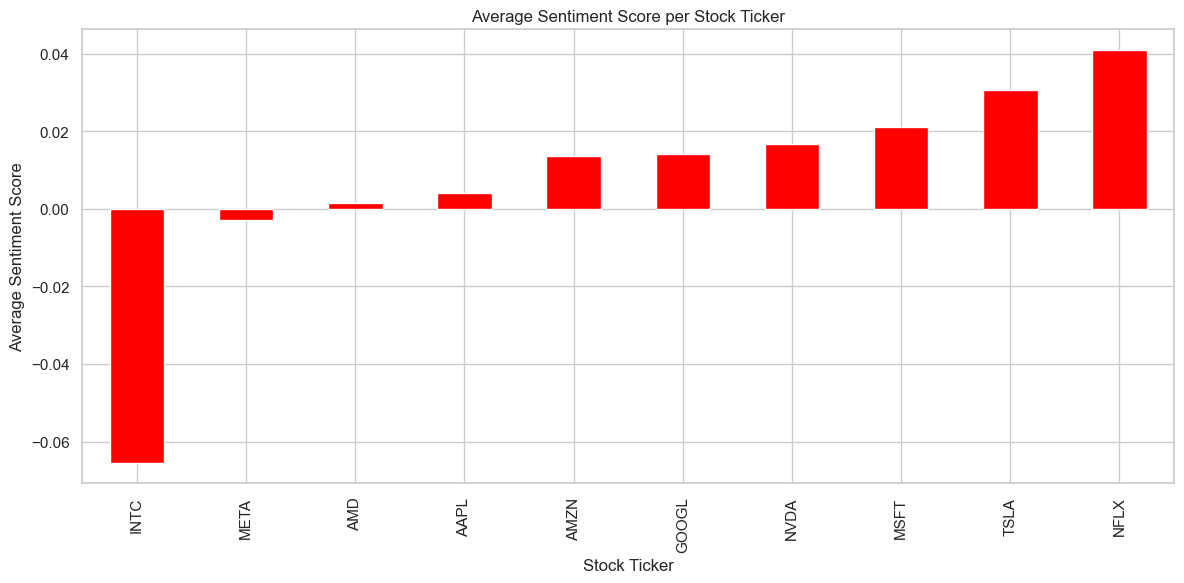

In [16]:
plt.figure(figsize=(12, 6))
stock_sentiment.plot(kind="bar", color="red")
plt.title("Average Sentiment Score per Stock Ticker")
plt.xlabel("Stock Ticker")
plt.ylabel("Average Sentiment Score")

plt.tight_layout()
plt.show()

- Most Positive Sentiment:
NFLX (Netflix), TSLA (Tesla), and MSFT (Microsoft) show the highest average retail sentiment.
These stocks are often heavily discussed online, and public perception tends to be optimistic, possibly due to recent performance, innovation, or strong brand loyalty.

- Most Negative Sentiment:
INTC (Intel) stands out with a significantly negative sentiment, possibly due to poor earnings, competitive pressure, or negative news sentiment during the data period.
META (Meta) also shows slightly negative sentiment.

- Neutral or Slightly Positive Sentiment:
AAPL, AMD, GOOGL, and AMZN hover around neutral but slightly positive sentiment scores, indicating a balanced or cautiously optimistic view by retail investors.

- Sentiment Spread:
The range is relatively narrow (from about -0.06 to +0.04), suggesting that most sentiment scores are close to neutral, but the extremes (like INTC and NFLX) are worth investigating deeper.



### sectors have higher average sentiment or mentions



In [17]:
sector_analysis = df.groupby('Sector')[['Sentiment_score', 'Mentions_volume']].mean().sort_values(by='Sentiment_score')
sector_analysis

,Sentiment_score,Mentions_volume
Sector,,
Healthcare,-0.004448,5091.596282
Consumer,0.002231,4990.302752
Finance,0.009561,5153.719728
Tech,0.022760,5231.375167


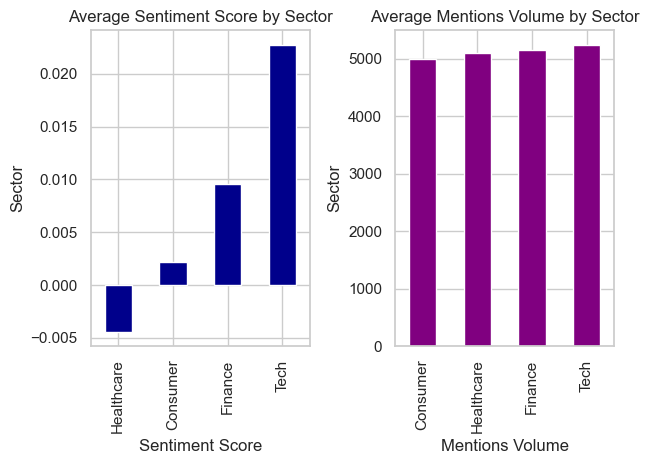

In [18]:
# Plot 1: Average Sentiment Score by Sector
plt.subplot(1, 2, 1)
sector_analysis['Sentiment_score'].sort_values().plot(kind='bar', color='darkblue')
plt.title("Average Sentiment Score by Sector")
plt.xlabel('Sentiment Score')
plt.ylabel("Sector")

# Plot 2: Average Mentions Volume by Sector
plt.subplot(1, 2, 2)
sector_analysis['Mentions_volume'].sort_values().plot(kind='bar', color='purple')
plt.title("Average Mentions Volume by Sector")
plt.xlabel('Mentions Volume')
plt.ylabel("Sector")

plt.tight_layout()
plt.show()

1. Average Sentiment Score by Sector
- Tech sector has the highest positive sentiment, indicating strong retail optimism or favorable news around technology companies.
- Finance and Consumer sectors show mildly positive sentiment — indicating neutral to slightly optimistic views.
- Healthcare has a negative average sentiment, suggesting investor concerns, negative news coverage, or lower public confidence in that sector during the period.

2. Average Mentions Volume by Sector
- All four sectors (Tech, Finance, Healthcare, Consumer) have similar levels of mentions (around 5000), meaning:
- Retail attention is evenly distributed, with no single sector dominating discussion volume.
- Therefore, sentiment differences are not due to attention levels, but possibly due to perceived performance, news sentiment, or public opinion.
--------------------------------------------------------

* Tech sector has the highest positive sentiment and strong attention.

* Healthcare shows negative sentiment despite high mentions — possible negative outlook.

* Mentions volume is similar across sectors, so sentiment differences reflect actual investor sentiment, not attention bias.

### average sentiment change over time

In [19]:
daily_sentiment = df.groupby("Date")["Sentiment_score"].mean()
daily_sentiment

Date
2020-01-01    0.0134
2020-01-02   -0.4785
2020-01-03    0.2149
2020-01-04    0.3316
2020-01-05   -0.1229
               ...  
2020-10-22    0.1375
2020-10-23   -0.2169
2020-10-24    0.4115
2020-10-25    0.1131
2020-10-26   -0.0353
Name: Sentiment_score, Length: 300, dtype: float64

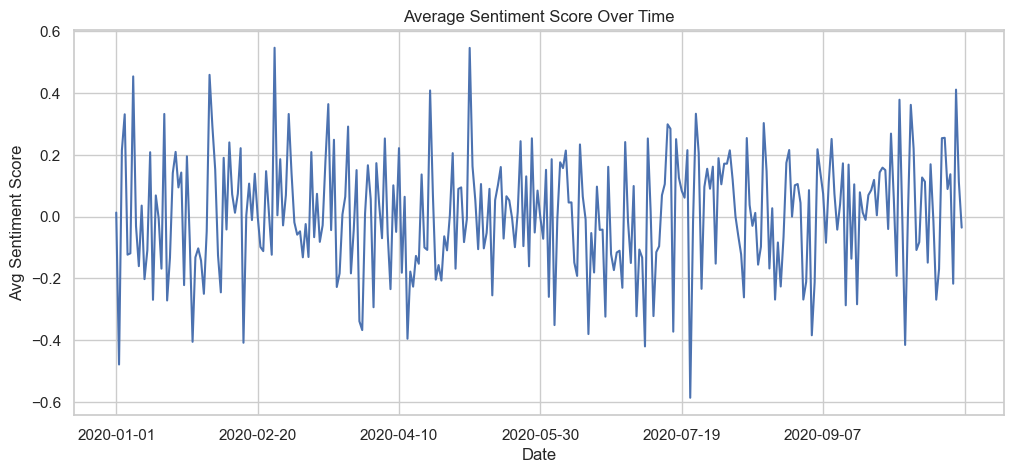

In [20]:
daily_sentiment.plot(figsize=(12, 5), title="Average Sentiment Score Over Time")
plt.ylabel("Avg Sentiment Score")
plt.xlabel("Date")
plt.show()

- The average sentiment score fluctuates significantly day-to-day, showing high volatility in retail sentiment.
- Sentiment alternates between positive and negative, indicating frequent mood swings in public or media perception.
- There is no clear long-term upward or downward trend, but spikes may align with major news, earnings, or market events.
- A few sharp sentiment peaks and dips could signal days with major retail or media impact across multiple stocks.

### correlation with Mentions_volume,Close_price, Day_return_%, or Volatility_index

In [21]:
correlation = df[["Mentions_volume","Close_price" ,"Volatility_index", "Day_return_%"]].corr()
print(correlation)

                  Mentions_volume  Close_price  Volatility_index  Day_return_%
Mentions_volume          1.000000     0.021298         -0.012807      0.004518
Close_price              0.021298     1.000000          0.010936     -0.007548
Volatility_index        -0.012807     0.010936          1.000000      0.008087
Day_return_%             0.004518    -0.007548          0.008087      1.000000


- There is no strong correlation between Mentions_volume and stock price, volatility, or returns.
- This suggests that retail attention (mentions) alone does not directly drive short-term price or volatility movements in this dataset.

### Correlation Between Sentiment Score and Returns

In [22]:
df[["Sentiment_score", "Day_return_%", "Week_return_%", "Month_return_%"]].corr()

,Sentiment_score,Day_return_%,Week_return_%,Month_return_%
Sentiment_score,1.000000,0.012000,0.003528,-0.000326
Day_return_%,0.012000,1.000000,0.006379,0.016607
Week_return_%,0.003528,0.006379,1.000000,-0.002872
Month_return_%,-0.000326,0.016607,-0.002872,1.000000


- Sentiment score has very weak or no correlation with short- or long-term returns.
- This suggests that sentiment, as measured here, is not linearly predictive of future returns on its own.



### Impact of High Sentiment on Future Stock Returns


In [23]:
high_sent = df[df["Sentiment_score"] > 0.2]
high_sent[["Day_return_%", "Week_return_%", "Month_return_%"]].mean()

Day_return_%      0.118140
Week_return_%     0.098364
Month_return_%    0.082306
dtype: float64

In [24]:
df[["Day_return_%", "Week_return_%", "Month_return_%"]].mean()

Day_return_%      0.04578
Week_return_%     0.11471
Month_return_%    0.08646
dtype: float64

Days with high sentiment scores are usually followed by small positive returns.

- Stocks go up a little the next day, and still a bit in the next week or month.

- The effect is strongest the next day, then slowly fades.

This means positive sentiment might help predict short-term gains, but the impact is not very large.



### Relationship between Volatility_index and Sentiment_score or Mentions_volume


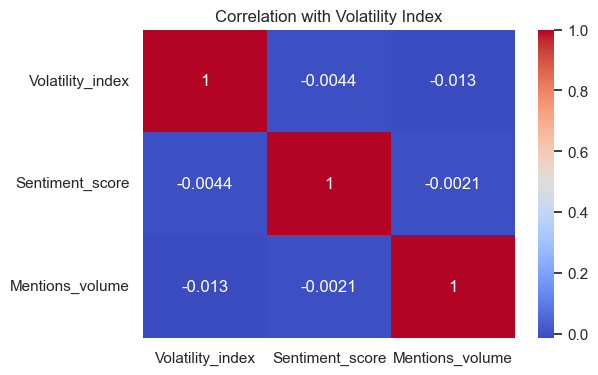

In [25]:
vol_corr = df[['Volatility_index', 'Sentiment_score', 'Mentions_volume']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(vol_corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Volatility Index")
plt.show()

There is very weak or negligible correlation between the Volatility Index and both:
- Sentiment Score (correlation ≈ -0.0044)
- Mentions Volume (correlation ≈ -0.013)

Investor sentiment and media attention (mentions) do not significantly influence or reflect changes in stock market volatility based on this data.


### Average Sentiment Score: High vs Low Sharpe Ratio

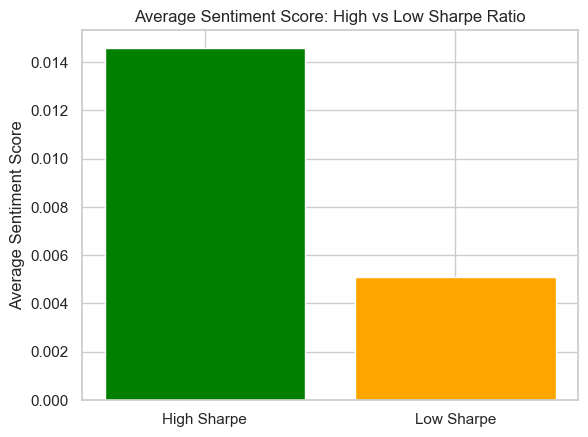

In [26]:
threshold = df['Sharpe_ratio'].quantile(0.75)

# Split data
high_sharpe = df[df['Sharpe_ratio'] >= threshold]
low_sharpe = df[df['Sharpe_ratio'] < threshold]

# Calculate average sentiment
avg_sentiment_high = high_sharpe['Sentiment_score'].mean()
avg_sentiment_low = low_sharpe['Sentiment_score'].mean()

# Plot
plt.bar(['High Sharpe', 'Low Sharpe'],
        [avg_sentiment_high, avg_sentiment_low],
        color=['green', 'orange'])
plt.title("Average Sentiment Score: High vs Low Sharpe Ratio")
plt.ylabel("Average Sentiment Score")
plt.show()

Stocks with a high Sharpe ratio tend to have a higher average sentiment score compared to those with a lower Sharpe ratio. This suggests that better risk-adjusted performing stocks are associated with more positive market sentiment.

### relationship between sentiment and RSI, MACD, or Momentum

In [27]:
correlation = df[['Sentiment_score', 'Macd', 'Rsi', 'Momentum']].corr()
print(correlation)

                 Sentiment_score      Macd       Rsi  Momentum
Sentiment_score         1.000000 -0.013387  0.039240  0.010300
Macd                   -0.013387  1.000000 -0.036547  0.001279
Rsi                     0.039240 -0.036547  1.000000  0.015244
Momentum                0.010300  0.001279  0.015244  1.000000


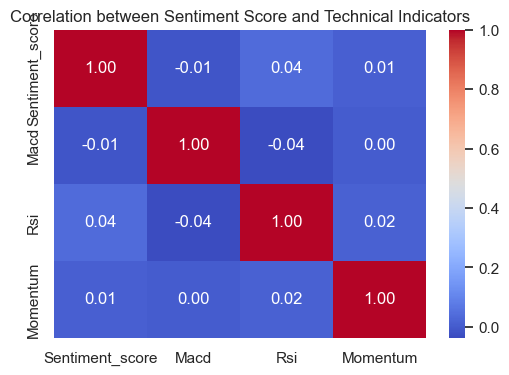

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Sentiment Score and Technical Indicators")
plt.show()

- There is no strong relationship between Sentiment Score and the technical indicators RSI, MACD, or Momentum.
- All correlation values are very close to zero, indicating little to no linear correlation.

In [29]:
sector_correlation = df.groupby('Sector')['Sentiment_score', 'Day_return_%'].corr()
sector_correlation = sector_correlation.sort_values(by='Sentiment_score', ascending=False)
sector_correlation

C:\Users\shamn\AppData\Local\Temp\ipykernel_4188\2415843540.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sector_correlation = df.groupby('Sector')['Sentiment_score', 'Day_return_%'].corr()


Sentiment_score  Day_return_%
Sector                                                   
Consumer   Sentiment_score         1.000000     -0.036300
Finance    Sentiment_score         1.000000      0.028099
Healthcare Sentiment_score         1.000000     -0.007639
Tech       Sentiment_score         1.000000      0.064074
           Day_return_%            0.064074      1.000000
Finance    Day_return_%            0.028099      1.000000
Healthcare Day_return_%           -0.007639      1.000000
Consumer   Day_return_%           -0.036300      1.000000

### sentiment vs Return Correlation by Sector

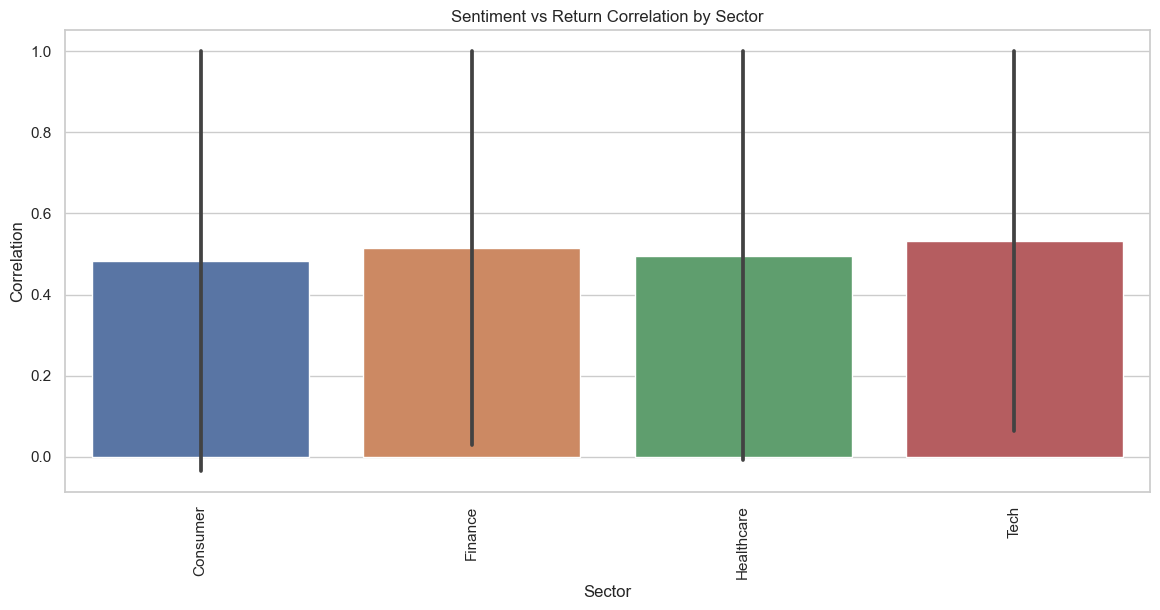

In [30]:
sector_correlation = sector_correlation.reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=sector_correlation, x='Sector', y='Sentiment_score')
plt.xticks(rotation=90)
plt.title("Sentiment vs Return Correlation by Sector")
plt.xlabel("Sector")
plt.ylabel("Correlation")
plt.show()

- Sentiment Sensitivity: The sectors (Consumer, Finance, Healthcare, Tech) seem to show a moderate positive correlation with returns, but none of them appear to be strongly influenced by sentiment. The correlation value for each sector is around 0.4, which suggests that while sentiment has some impact on returns, it is not the primary factor driving performance in these sectors.

- Overall Insight: None of the sectors seem to exhibit extreme sentiment sensitivity, as seen from the near-equal correlation values. This could suggest that other factors beyond sentiment (such as economic indicators, company performance, or global trends) might play a more significant role in stock returns in these sectors.

### Sentiment vs Return Correlation by Stock

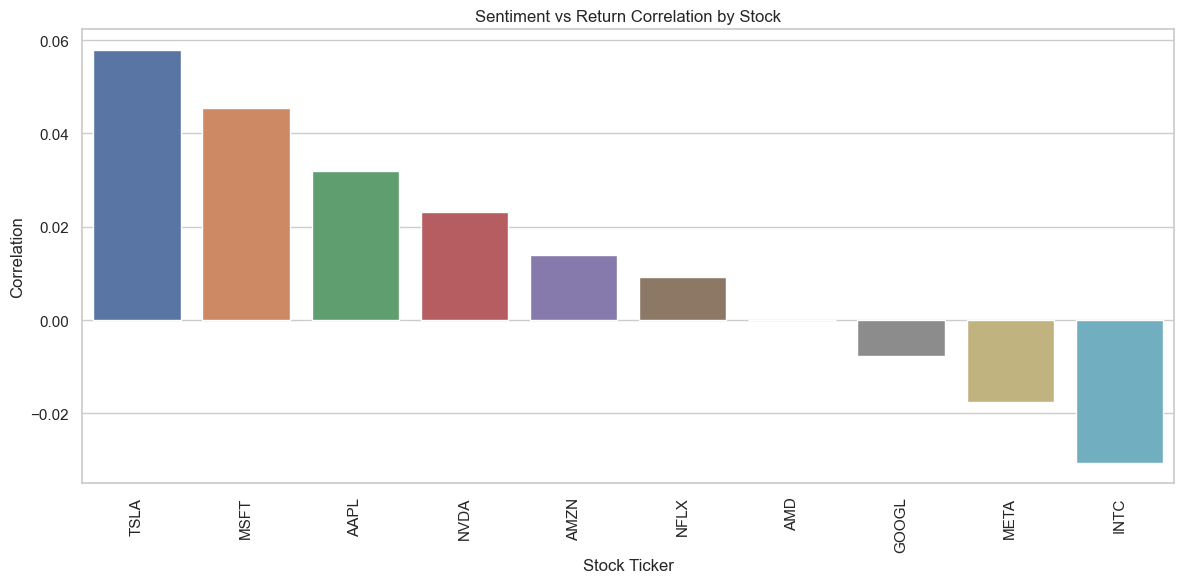

In [31]:
# Calculate correlation between Sentiment and Return for each stock
correlation_df = df.groupby('Stock_ticker')[['Sentiment_score', 'Day_return_%']].corr().iloc[0::2, -1].reset_index()
correlation_df = correlation_df[['Stock_ticker', 'Day_return_%']]
correlation_df.columns = ['Stock_ticker', 'Sentiment_Return_Corr']

# Sort by correlation
correlation_df = correlation_df.sort_values(by='Sentiment_Return_Corr', ascending=False)

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='Stock_ticker', y='Sentiment_Return_Corr')
plt.xticks(rotation=90)
plt.title("Sentiment vs Return Correlation by Stock")
plt.ylabel("Correlation")
plt.xlabel("Stock Ticker")
plt.tight_layout()
plt.show()

Sentiment scores show a positive correlation with returns for stocks like TSLA, MSFT, and AAPL, suggesting predictive potential. However, stocks like INTC and META show negative or no correlation, indicating that sentiment impact varies by stock and should be combined with other indicators for better prediction.

  Stock_ticker  Sentiment_score  Day_return_%  Sharpe_ratio  Mentions_volume  \
4         INTC        -0.065467      0.151400      0.973167      4772.056667   
0         AAPL         0.004197      0.135800      1.068367      5103.660000   
9         TSLA         0.030730      0.104433      1.005167      5021.630000   
2         AMZN         0.013527      0.095233      1.091067      4990.650000   
7         NFLX         0.040950      0.052100      0.936267      5024.980000   
1          AMD         0.001627      0.043500      0.924800      5148.110000   
5         META        -0.002900      0.017633      0.998033      5126.980000   
6         MSFT         0.021130      0.013300      1.039900      5386.280000   
3        GOOGL         0.014230     -0.033700      1.217733      5442.843333   
8         NVDA         0.016733     -0.121900      0.959467      5142.333333   

   Trading_volume  
4    4.966418e+07  
0    5.005861e+07  
9    5.421862e+07  
2    5.060641e+07  
7    5.085872e+07  

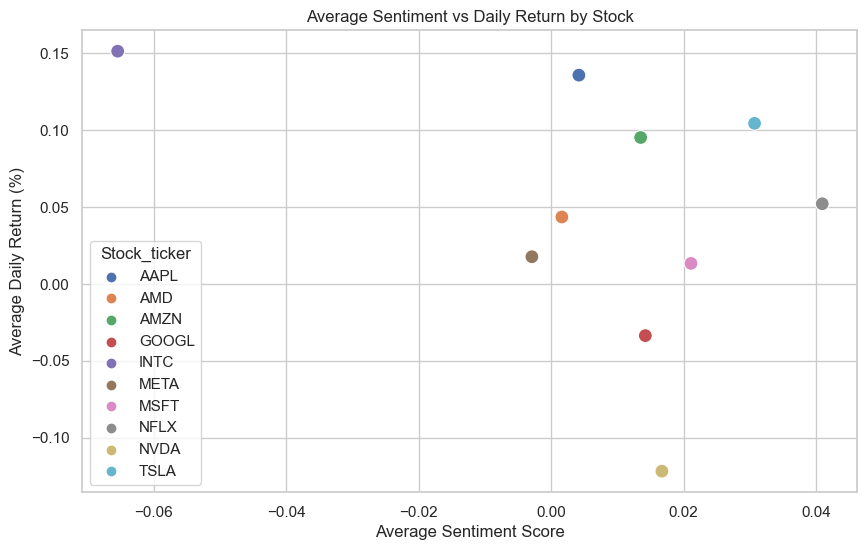

In [ ]:
agg_df = df.groupby('Stock_ticker')[['Sentiment_score', 'Day_return_%', 'Sharpe_ratio', 'Mentions_volume', 'Trading_volume']].mean().reset_index()


print(agg_df.sort_values(by='Day_return_%', ascending=False).head(10))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='Sentiment_score', y='Day_return_%', hue='Stock_ticker', s=100)
plt.title('Average Sentiment vs Daily Return by Stock')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Daily Return (%)')
plt.show()

- Mixed Relationship:
There’s no clear linear trend between average sentiment and daily return. Some stocks with positive sentiment have negative returns, and vice versa.

- High Return Outlier:
One stock (likely INTC) with strong negative sentiment has the highest average return. This could suggest contrarian behavior or an underappreciated stock.

- Sentiment Not Always Predictive:
Stocks like GOOGL and NVDA show positive sentiment but negative or neutral returns, indicating sentiment does not always translate into performance.

- TSLA and NFLX:
Appear to have both high sentiment and decent returns, suggesting some alignment between public sentiment and stock performance.

- Wide Spread:
Sentiment scores are generally close to zero (between -0.06 and +0.04), while returns vary much more, showing volatility in performance regardless of sentiment intensity.



# conclusion

1. Sentiment Distribution:
- Sentiment scores, news sentiment, and mentions volume are fairly uniformly distributed, indicating no strong bias toward positive or negative sentiment.

2. Stock-wise Sentiment:
- Most Positive: TSLA, NFLX, MSFT — likely due to innovation, strong brand, or good performance.
- Most Negative: INTC, META — possibly due to poor performance or negative news.
- Neutral to Slightly Positive: AAPL, AMD, GOOGL, AMZN — show balanced public perception.

3. Sector-wise Sentiment:
- Tech shows the highest positive sentiment.
- Healthcare shows negative sentiment despite high attention.
- Finance and Consumer sectors have mildly positive sentiment.

4. Mentions Volume:
- Roughly equal across sectors (~5000), suggesting sentiment differences are not driven by attention volume.If Tech has higher positive sentiment and Healthcare has negative sentiment, it's not because Tech was talked about more.
- Since mention volume is similar, the differences in sentiment must come from how people feel or talk about the stocks, not how much they talk about them.

5. Daily Sentiment Volatility:
- Sentiment fluctuates sharply day-to-day.
- No long-term upward or downward trend observed.

6. Sentiment vs Returns:
- Very weak or no correlation with short- or long-term returns.
- Positive sentiment may slightly predict next-day gains, but the effect fades quickly.

7. Sentiment vs Volatility Index:
- Almost no correlation between sentiment or mentions and market volatility.

8. Sentiment vs Technical Indicators:
- No strong correlation with RSI, MACD, or Momentum indicators.

9. Sentiment vs Sharpe Ratio:
- Stocks with higher  ratios tend to have higher sentiment, suggesting a weak link between risk-adjusted performance and sentiment.
Sharpe
10. Sector Sensitivity to Sentiment:
- Moderate (≈0.4) correlation with returns across sectors.
- Sentiment has some influence, but not the primary factor in returns.

11. Stock-specific Insights:
- TSLA, NFLX: Positive sentiment aligns with positive returns.
- INTC: Negative sentiment but high returns — potential contrarian behavior.
- GOOGL, NVDA: Positive sentiment doesn’t always lead to strong returns.

12. verall Insight:
- Sentiment alone is not a strong predictor of returns or volatility.
- Best used in combination with other factors like fundamentals or technicals for better forecasting.

## insights

- Sentiment is evenly distributed — no systemic bias toward optimism or pessimism.
- High-sentiment stocks don’t always deliver high returns (e.g., GOOGL, NVDA), and some low-sentiment stocks perform well (e.g., INTC).
- Technical indicators (RSI, MACD, Momentum) and volatility show no strong link to sentiment.
- Sharpe ratio and sentiment show a mild positive relationship — well-performing stocks tend to attract better sentiment.

Sentiment analysis can offer supplementary context for short-term trading or market mood, but should not be relied upon in isolation for investment decisions. It’s best used alongside technical, fundamental, and macroeconomic analysis.